# Starting with the basics

# MNIST using ANNs

## Importing MNIST + a little history

* MNIST consists of black & white images of 28 x 28 pixels each and a total of <b>70,000 images</b> (60,000 for training and 10,000 for testing).
* It was created by Yann LeCunn in 1988.
* It consists of digits from 0 - 9 taken from the US Postal Service. 
* It is known as the 'Hello World' into Deep Learning as most practitioners begin with the MNIST dataset.  

* The tensorflow library has a bunch of datasets built-in that we can directly call in our code. 
* They don't need to be downloaded externally from another source.

* We can check the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/datasets">tf.keras.datasets</a> library to know more about the different datasets available.

In [21]:
import numpy as np

MNIST = tf.keras.datasets.mnist

# check documentation on tf.keras.datasets.mnist to know about how to load the dataset. 

(x_train, y_train), (x_test, y_test) = MNIST.load_data()

# The x_train and x_test variables contain the actual pixel values for all 784 pixels in each image.
# While the y_train and y_test variables contain the corresponding digit from 0 - 9. 

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


## Data Visualization

As we can see, the dataset is in the form of numpy arrays. Let us see what happens when we print a single 28 x 28 (2-d) array.

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* This doesn't look anything like an image though, and we know that MNIST dataset consists of images of numbers from 0 - 9. 

* To plot these images, we will use the matplotlib library, which allows us to convert arrays of pixel values like above, into images that we can infer from easily.

Visualizing the dataset by plotting 6 random images

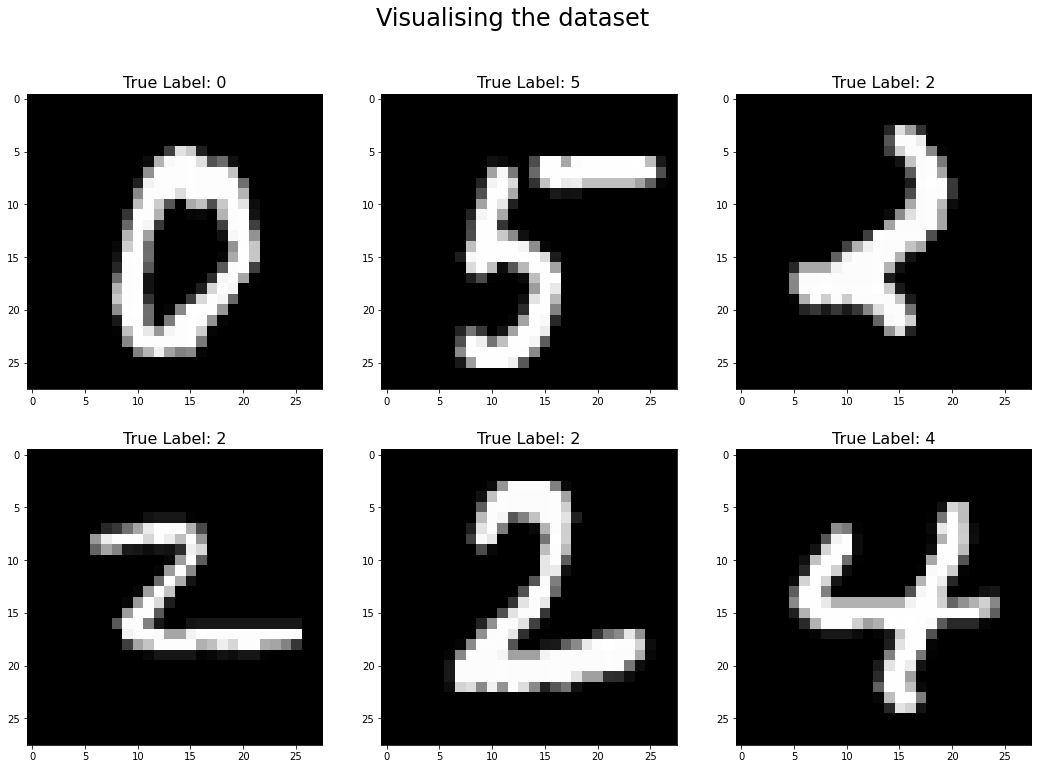

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, 60000)
        ax[i, j].imshow(x_train[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_train[index]}', fontsize=16)
        index += 1

plt.suptitle('Visualising the dataset', fontsize=24)
plt.show()

* Here, we visualized the dataset by plotting their images using the <b>matplotlib</b> library. 

* The imshow() function converts the numpy arrays that the images originally are, into their correct pixel values and creates their images.

## Data Transformation

* Now, we saw above while printing the numpy array that each image consists of pixel values from 0 - 255. And as we learned at the start of this workshop in Simple Linear Regression, bigger values skew the results towards their side even though they might not necessarily be more important. 

* For example, in a 28 x 28 image of a digit, the black pixels surrounding the number are also just as important as the white pixels that make-up the number.

* So, to counter this, we transform our data from pixel values of 0-255, to pixel values scaled down to 0-1. 

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model Building

* Now comes the most exciting part of the entire ML journey...drumroll🥁... Building the ANN Model !!

* First, let's get over the jargon and syntax essential to build a model using tensorflow.

* As we can see, building a deep learning model using tensorflow is not coding heavy at all. 

* Infact, this is the simplest way to build a deep learning network and the best way to begin with. 

* We initialise the Sequential() model class from tensorflow which uses keras as it's backend. The Sequential() API allows us to add layers one after the other in a very intuitive way. 

* Using the Sequential() model, we don't need to create any Data Loaders, Batch Loaders, we don't need to create different classes and functions for each Dense/Dropout layers. 

* We can add new layers in the model by just using the model.add(layer) function.

* Tensorflow takes care of it all for us. 

* Now, the layers in a Neural Network consist of the following: <b>[JARGON ALERT]</b>

    * Flatten() - The Flatten() layer converts the 28 x 28, 2-dimensional input into a 784-length vector. 

    * Dense() - This is essentially the multi-layered perceptron we talked about. We can adjust the number of neurons/perceptrons in each Dense layer. For simplicity, I have just kept them as 64 neurons for both Dense() layers.
    
    * Dropout() - Randomly drops a given percentage of neuron values to ensure uniformity and curb overfitting. 

In [17]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


model = Sequential()
model.add(Flatten(input_shape = x_train[0].shape))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

* By printing out the model summary, we can see the output shape of each layer that acts as an input to the next layer. 

* We can also see that the output shape for the final layer is 10, which is the number of unique values in our dependant variable Y.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________

* The total number of paramenters (that is the number of different weights and biases) are 55,000. Thought this might look like a huge number, this is miniscule compared to the Billions of parameters that State of the Art models are trained on. 

* Those models require tremendous computational power to train and are genreally trained on supercomputers connected to multiple GPUs at a time. 

* This requirement for huge computational power and longer training periods is what drives the cost for newer better State of the Art models to go up considerably. 

## Compiling and training the model

* Next, we compile and fit the data to the model created. 

* All of this just takes 2 lines of codes and nothing more!! That seems mind blowing to me till this day 🤯

* Explaining the optimizers and loss functions: <b>[JARGON ALERT]</b>

    * Loss function: What does ```sparse_categorical_crossentropy``` mean? 
        * Once again, we will simply refer the tensorflow documentation for this. Link <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy">here.</a>

        * We use this loss function when we are doing multi-label classification (2 or more label classes). We have 10 in our case, 0-9. 

        * For labels that are in a one-hot-encoded format, we use the ```CategoricalCrossentropy``` loss function. To know more about, one-hot-encoding, Link <a href = "https://www.educative.io/blog/one-hot-encoding">here.</a>

    * Optimizer: 
        * As explained above in Simple Linear Regression, we optimize our parameters (weights and biases) using a method called Gradient Descent. 

        * The different hyperparameters in the Gradient Descenet Algorithm include the learning rate and methods on how to initialise the weights and bias. 

        * This is where the ```Adam``` optimizer comes in - It has pre-defined values for learning rate and other hyperparameters which work well enough for our case!

        * More on the ```Adam``` optimizer can be found <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">here.</a>

In [18]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 4ms/step - loss: 0.6947 - accuracy: 0.8006 - val_loss: 0.2736 - val_accuracy: 0.9208
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9121 - val_loss: 0.2003 - val_accuracy: 0.9384
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2437 - accuracy: 0.9287 - val_loss: 0.1692 - val_accuracy: 0.9489
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2099 - accuracy: 0.9380 - val_loss: 0.1497 - val_accuracy: 0.9547
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1872 - accuracy: 0.9442 - val_loss: 0.1332 - val_accuracy: 0.9601
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1706 - accuracy: 0.9491 - val_loss: 0.1249 - val_accuracy: 0.9624
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1588 - accuracy: 0.9526 - val_loss: 0.1171 - val_accuracy

## Viewing misclassified examples

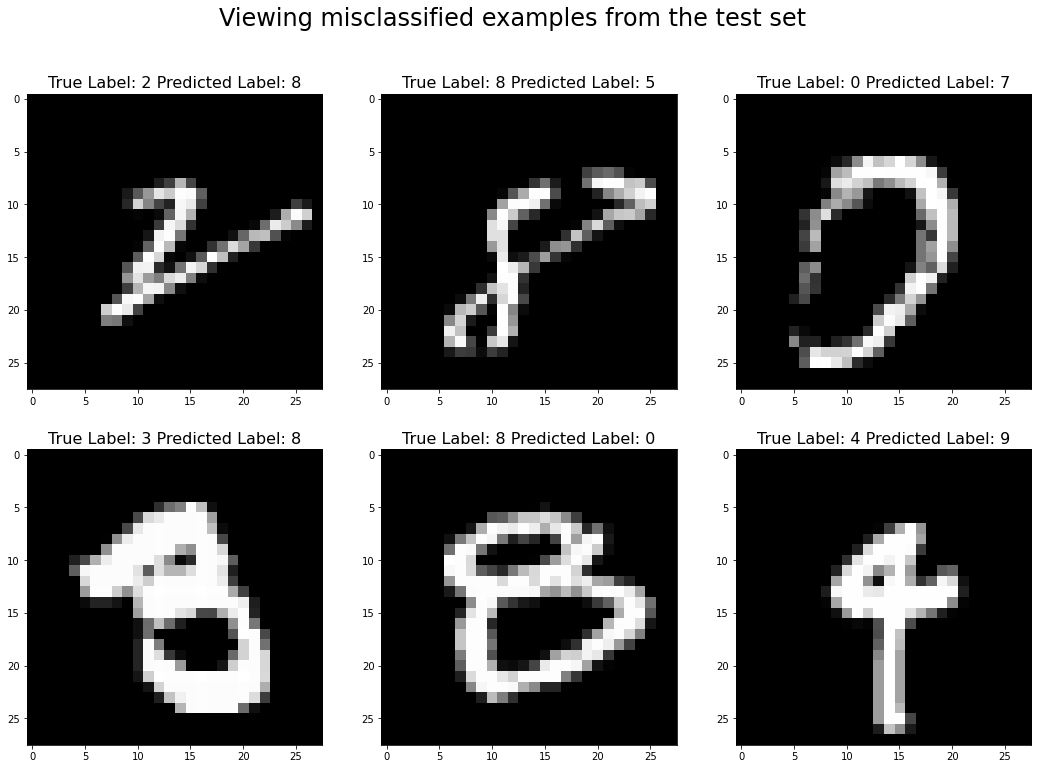

In [20]:
import random

model_predictions = model.predict(x_test).argmax(axis=1)

misclassified_examples = np.where(model_predictions != y_test)[0] # Since it returns a tuple containing an array.

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

for i in range(2):
    for j in range(3):
        index = random.choice(misclassified_examples)
        ax[i, j].imshow(x_test[index], cmap='gray')
        ax[i, j].set_title(f'True Label: {y_test[index]} Predicted Label: {model_predictions[index]}', fontsize=16)

plt.suptitle('Viewing misclassified examples from the test set', fontsize=24)
plt.show()

## Saving and Loading Model

* Tensorflow also has built-in modules that allow us to freeze the model parameters and save them for future use. 

In [76]:
# Saving and loading the model for future use:

from tensorflow.keras.models import load_model

model.save('MNIST_ANN.h5')

saved_model = load_model('MNIST_ANN.h5')

saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
____________________________________________________